# Deep Hedging AI
### Convergence to Black & Scholes Delta
#### Base case: BS with (statistical) drift 0.1, cvar@1, 400 epochs, zero cost, 50000 path
#### This file: drift is zero
Hans Buehler, January 2nd, 2023


In [1]:
""" Slighly annoying: by default the SageMaker Python import directory does not include our git directory """
import os
p = os.getcwd()
dhn = "/deephedging/"
i = p.find(dhn)
if i!=-1:
    p = p[:i]
    import sys
    sys.path.append(p)
    print("SageMaker: added python path %s" % p)

SageMaker: added python path /home/ec2-user/SageMaker


Deep Hedging AI says hello ... 

2023-01-08 01:59:28.969886: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-08 01:59:28.969934: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-44-231.eu-west-2.compute.internal): /proc/driver/nvidia/version does not exist


Tensorflow version 2.7.1 running on 1 CPUs and 0 GPUs


## Deep Hedging in a Black \& Scholes World

2023-01-08 01:59:29.456656: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-08 01:59:30.556812: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Caching enabled @ '/home/ec2-user/dh_cache/2126d8c6b352d93e5f84b248492ec377.pck'
Cache successfully loaded. Current epoch: 165
Deep Hedging Engine: warming up to train 8403 weights using 236 remaining epochs over 10000 samples and 1000 validation samples ...         


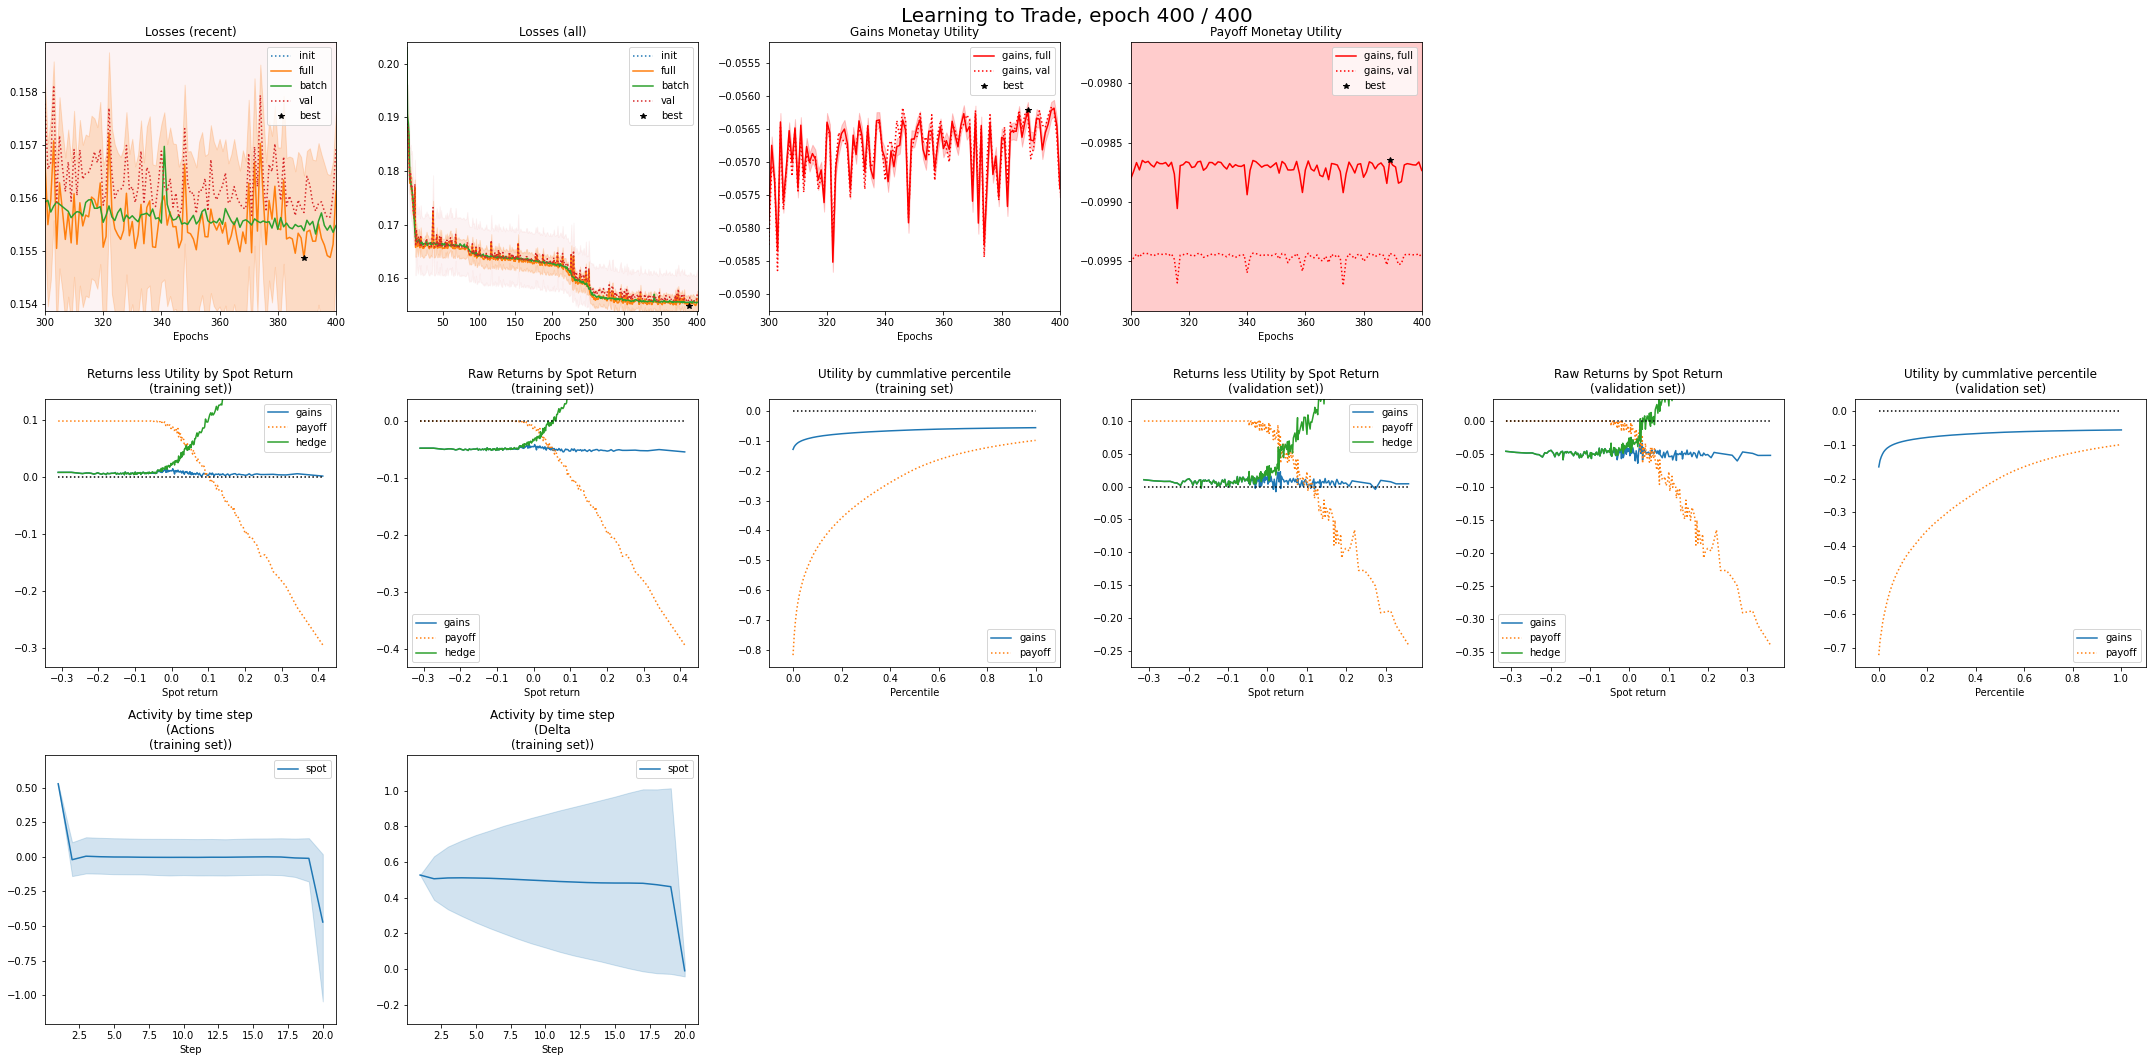

Cache: writing epoch 399 to /home/ec2-user/dh_cache/2126d8c6b352d93e5f84b248492ec377.pck                                                                                                                     156936 (0.00459917). Best epoch 388. Last cached epoch 390. | time elapsed 28:56; time per epoch 7s; estimated time remaining 7s                              
Training 400/400 epochs; 8403 weights; 10000 samples; 1000 validation samples batch size 32 | initial loss 0.751835 (0.0114432), full 0.15613 (0.00149764), best 0.154872 (0.0114432), batch 0.155479, val 0.156936 (0.00459917). Best epoch 388. Last cached epoch 399. | time elapsed 29:00; time per epoch 7s; estimated time remaining 7s                         
 Status: Ran all 400 epochs.
 Weights set to best epoch: 388
 State of training until epoch 399 cached into /home/ec2-user/dh_cache/2126d8c6b352d93e5f84b248492ec377.pck

Keys of the dictionary returned by the gym:  odict_keys(['loss', 'utility', 'utility0', 'gains', 'payoff', 

In [2]:
print("Deep Hedging AI says hello ... ", end='')

import importlib as imp
import deephedging.trainer as trainer
import deephedging.gym as gym
import deephedging.plot_training as plot_training

imp.reload(gym)
imp.reload(plot_training)
imp.reload(trainer)

from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM
import numpy as np

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = True
config.world.rvol = 0.2    # 20% volatility
config.world.drift = 0.    # real life drift
config.world.cost_s = 0.
# gym
config.gym.objective.utility = "cvar"
config.gym.objective.lmbda = 1.  
config.gym.agent.network.depth = 6
config.gym.agent.network.width = 40
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.optimizer = "adam"
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.caching.epoch_freq = 10
config.trainer.caching.mode = "on"
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Deep Hedging in a Black \& Scholes World"))

# create world & validation world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=config.world("samples")//10)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()

## Hedging results in detail

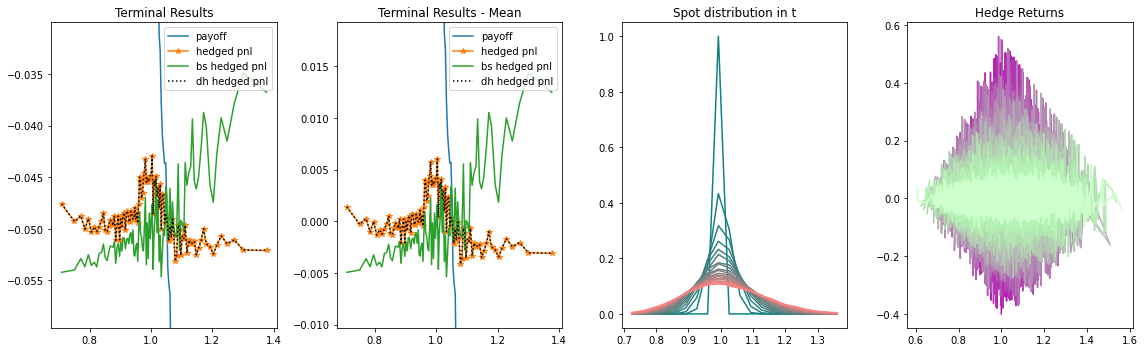

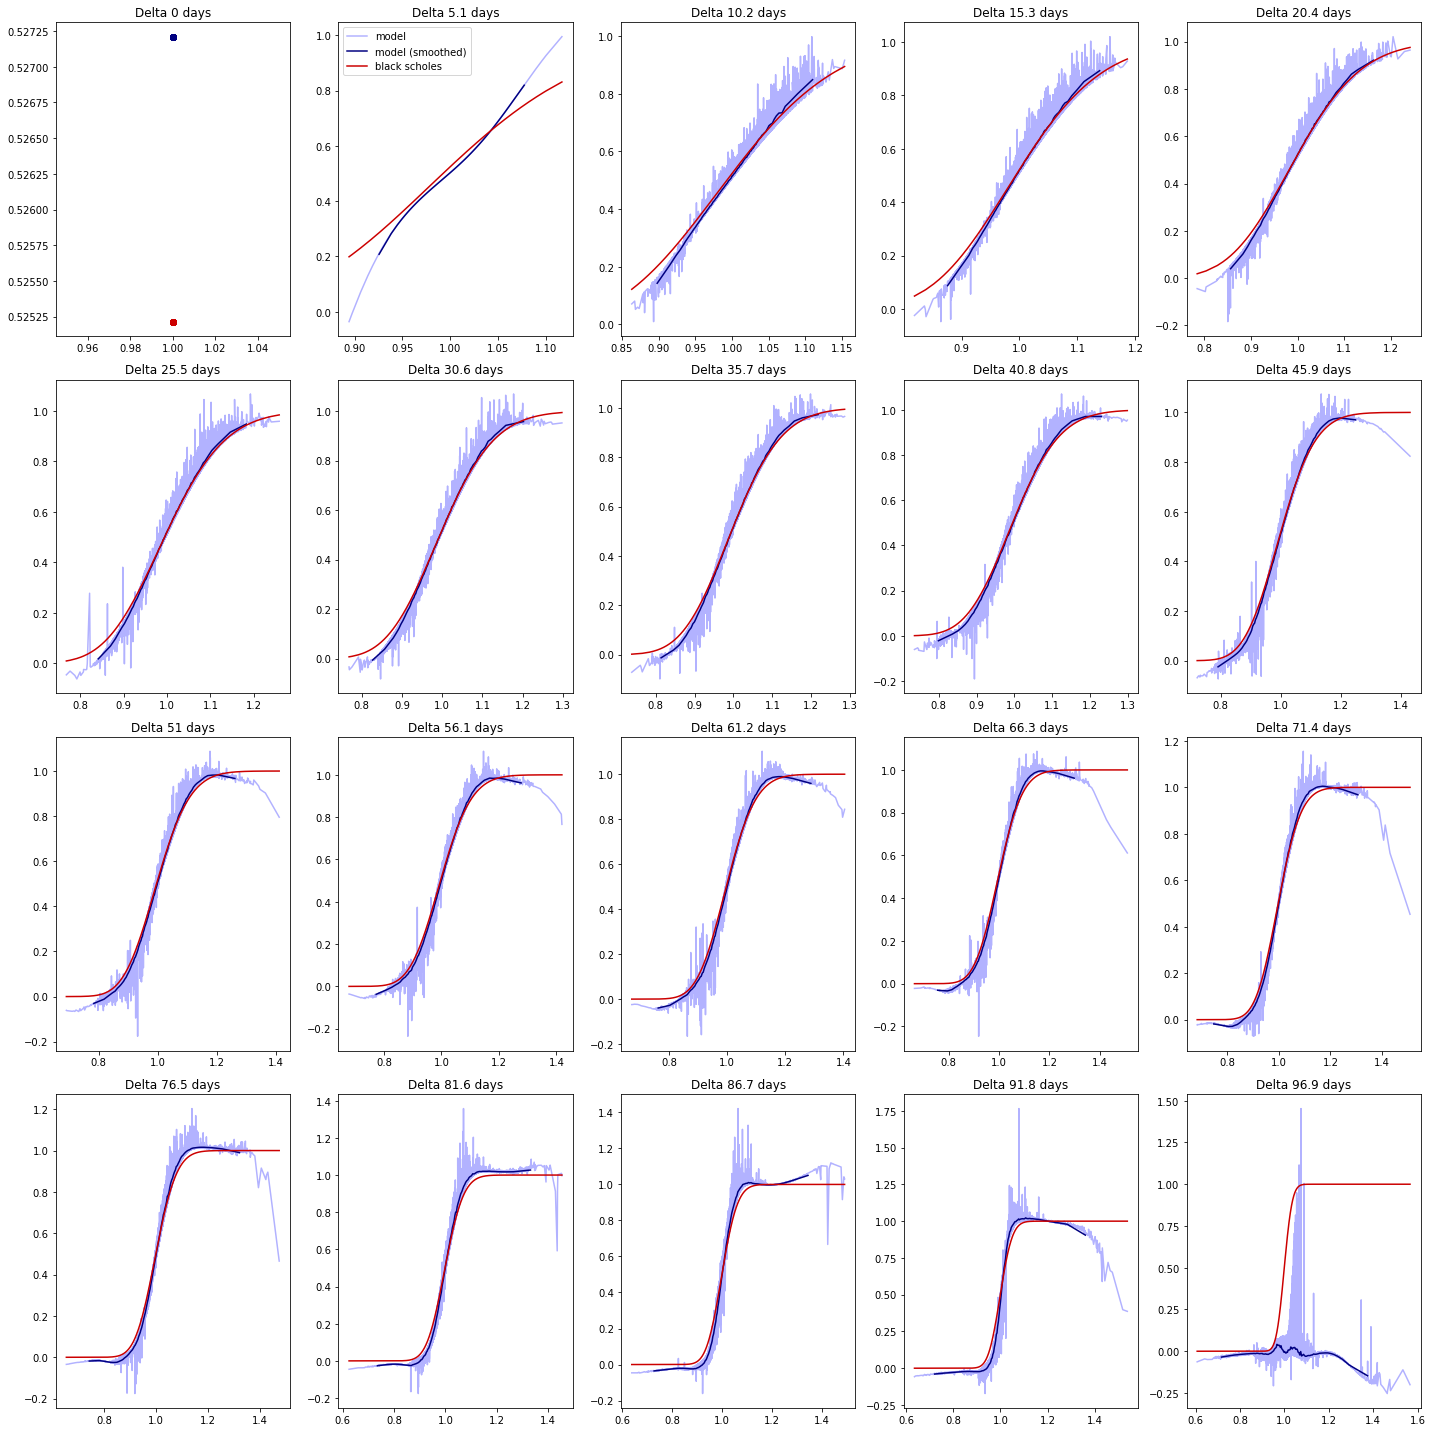

In [3]:
import deephedging.plot_bs_hedge as plot_bs_hedge
import imp
imp.reload(plot_bs_hedge)

display(Markdown("## Hedging results in detail"))
plot_bs_hedge.plot_blackscholes( world, gym, config )


{'class_name': 'Adam', 'config': {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}}
[73242, array([[ 7.08316293e-05,  4.00984951e-04,  2.63607595e-04,
        -1.81025025e-05,  2.36418360e-04,  5.29065146e-04,
        -2.17997050e-03,  8.07566161e-04,  2.91482080e-04,
        -1.09789791e-04,  3.26109701e-04,  1.25337887e-04,
         3.28795286e-04,  1.01504498e-03, -3.87204724e-04,
        -1.20893499e-04,  7.30323227e-05, -1.89590122e-04,
         2.01972784e-04,  2.79992586e-04, -4.40781063e-04,
        -5.97655540e-04,  1.20854878e-04,  2.07817895e-04,
         4.51361848e-06, -1.08648994e-04,  4.10458539e-04,
         2.89983145e-04,  1.70659681e-04, -1.73516601e-04,
         1.69137362e-04,  2.03491683e-04,  2.72115925e-04,
         5.66479401e-04, -1.49574422e-04, -6.65345229e-04,
        -2.22321134e-04,  4.28601954e-04,  3.91388574e-04,
        -4.35596419e-04],
       [ 4.52164677e-05,  9.10546165e-04, 

[1, 120, 40, 1600, 40, 1600, 40, 1600, 40, 1600, 40, 1600, 40, 40, 1, 1, 1, 120, 40, 1600, 40, 1600, 40, 1600, 40, 1600, 40, 1600, 40, 40, 1, 1, 1]
16807
8403


1000000000

12345
12.345K
12.345M
1234.57M
12.345G
1234.57G
1.23457e+10G


NameError: name 'self' is not defined